In [5]:
import numpy as np
import matplotlib.pyplot as plt
from random import random

EXTERNAL MODEL - THE ERGODIC CASE:
-----------------------------------------------
###### In which, both the infected and susceptible populations are changing endlessly in space according to alpha, beta and N values.

In [6]:
def evol_external_case(tot_pop, steps, init_cond, alpha, beta):
    list_of_states = [init_cond]
    
    step = 0
    while step < steps:
        current_s = list_of_states[-1]
        #probabilities 
        M_plus = (tot_pop - current_s)*beta
        M_minus = current_s*alpha
        #imagine you have created a random number between 0 and 1 and you want the probability of [M+1, M-1, (1- M+1 - M-1)]
        r = random()
        if r<M_plus:
            list_of_states.append(current_s + 1)
        if M_plus < r < M_plus + M_minus:
            list_of_states.append(current_s - 1)
        if r> M_plus + M_minus:
            list_of_states.append(current_s)
            
        step = step + 1
    return list_of_states
        

In [84]:
N = 100
alpha = 0.008
beta = 0.006
average_sus = beta/(alpha + beta)*N
average_inf = alpha/(alpha + beta)*N
std = np.sqrt(alpha*beta)/(alpha+beta)*np.sqrt(N)
steps = 10000000

In [144]:
# Calculating Max of inf and average Max
steps2 = 10000000
N = 100
alpha = 0.008
beta = 0.006
a = np.linspace(10,90,9)
o = 0
count = 0
for ic in a:
    m = []
    n = max(N - x for x in evol_external_case(N, steps2, ic, beta, alpha))
    m.append(n)
    o = o + n
    count += 1
    print(ic)
    print("Maximum No. of infected people from different initial conditions: " + str(m))
print('Average of max infected people per the total population:' + str(o/count))


10.0
Maximum No. of infected people from different initial conditions: [90.0]
20.0
Maximum No. of infected people from different initial conditions: [80.0]
30.0
Maximum No. of infected people from different initial conditions: [70.0]
40.0
Maximum No. of infected people from different initial conditions: [67.0]
50.0
Maximum No. of infected people from different initial conditions: [67.0]
60.0
Maximum No. of infected people from different initial conditions: [68.0]
70.0
Maximum No. of infected people from different initial conditions: [68.0]
80.0
Maximum No. of infected people from different initial conditions: [66.0]
90.0
Maximum No. of infected people from different initial conditions: [68.0]
Average of max infected people per the total population:71.55555555555556


Above: 
----------
As the we start from different initial states, up to a certain number of already infected population (~<70), and after many simulations, the maximum number reached of infected population ranges between 65 - 70 for most of the initial susceptible populations.

(According to the provided alpha, beta, N values)

Down below:
------------------
(uncomment the first hundred and last hundred steps in both the susceptible and infected populations to see how the two states converges by time around a certain steady state)

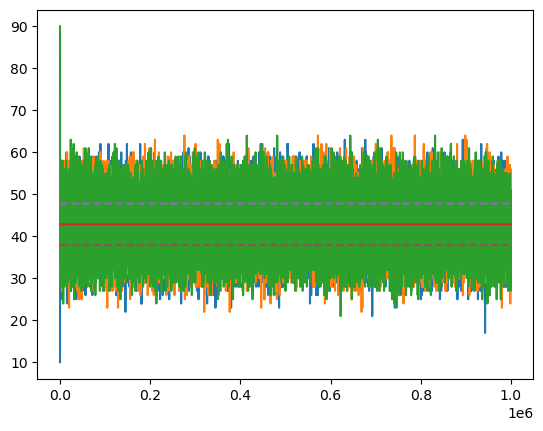

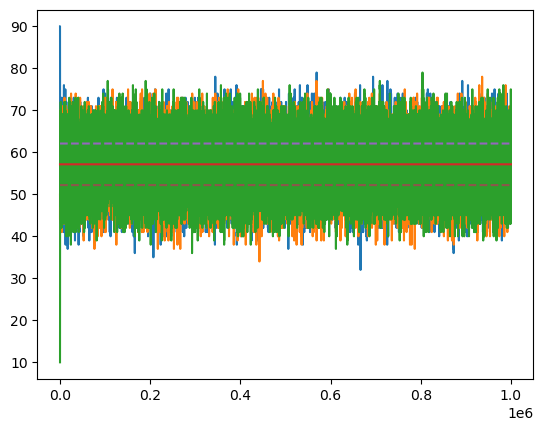

In [138]:
for init_cond in [10,50,90]:
    sus = evol_external_case(N, steps, init_cond, alpha, beta)
    plt.plot(sus)
plt.plot([average_sus for _ in sus])
plt.plot([average_sus + std for _ in sus], "--")
plt.plot([average_sus - std for _ in sus], "--")
#plt.xlim(0,100)
#plt.xlim(999900,1000000)
plt.show()

for init_cond in [10,50,90]:
    sus = evol_external_case(N, steps, init_cond, alpha, beta)
    plt.plot([N - x for x in sus])
plt.plot([average_inf for _ in sus])
plt.plot([average_inf + std for _ in sus], "--")
plt.plot([average_inf - std for _ in sus], "--")
#plt.xlim(0,100)
#plt.xlim(999900,1000000)
plt.show()

SIS MODEL (NO EXTERNAL AGENT) - THE ABSORBING CASE:
-----------------------------------------------
###### If the total population = S, then there is no chance to have infection. Because infection can come only from persons who have already infection.
###### As the infection ratio is declining by recovery, it is not replenished rapidly enough as the events between susceptible and infected people is in turn declining.

In [139]:
def evol_SIS_abs(tot_pop, steps, init_cond, alpha, beta):
    list_of_states = [init_cond]
    step = 0
    while step < steps:
        current_s = list_of_states[-1]
        #probabilities 
        M_plus = (tot_pop - current_s)*beta
        M_minus = (tot_pop - current_s)*current_s*alpha
        #imagine you have created a random number between 0 and 1 and you want the probability of [M+1, M-1, (1- M+1 - M-1)]
        r = random()
        if r<M_plus:
            list_of_states.append(current_s + 1)
        if M_plus < r < M_plus + M_minus:
            list_of_states.append(current_s - 1)
        if r> M_plus + M_minus:
            list_of_states.append(current_s)
            
        step = step + 1
    return list_of_states

In [140]:
N_2 = 100
alpha_2 = beta/200 #rate of infection
beta_2 = 0.005
steps_2 = 2000

###### By time there will be no infected population starting from any point (even 100% infected)

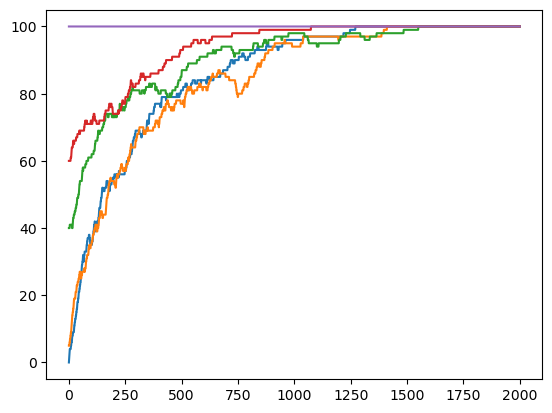

In [145]:
#it doesn't depend on the initial state
for init_cond2 in [0,5,40,60,100]:
    sus = evol_SIS_abs(N_2, steps_2, init_cond2, alpha_2, beta_2)
    plt.plot(sus)